# Homework: Compare Two Logistic Regression Models (Weather & Climate)

**Compare the performance of two logistic regression models**  
- **Model A (Full):** `CAPE`, `PWAT`, `Shear`  
- **Model B (Reduced):** `CAPE`, only

Does the three parameter model work better than the one parameter model?

**Tasks**
1. Split data into train/test.
2. Fit both models.
3. Compute **accuracy**, **precision**, **recall** at threshold 0.5.
4. Plot **ROC** and **Precision–Recall** curves for both models on the same figures.
5. Answer the interpretation questions.


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             average_precision_score, roc_auc_score,
                             RocCurveDisplay, PrecisionRecallDisplay)

FEATURES_FULL = ['cape','pwat','shear']
FEATURES_REDUCED = ['cape']
TARGET = 'event'

# Synthetic fallback
USE_SYNTHETIC = True

if USE_SYNTHETIC:
    rng = np.random.default_rng(42)
    n = 1200
    cape  = rng.gamma(5.0, 250.0, size=n)
    pwat  = rng.normal(30, 8, size=n).clip(5, 70)
    shear = rng.normal(15, 6, size=n).clip(0, 40)
    z = -6.0 + 0.0025*cape + 0.06*pwat + 0.05*shear + 0.00002*cape*shear
    p = 1/(1+np.exp(-z))
    y = rng.binomial(1, p)
    df = pd.DataFrame({'cape':cape, 'pwat':pwat, 'shear':shear, 'event':y})
else:
    df = pd.read_csv('../data/your_data.csv').dropna()
    assert TARGET in df.columns
    assert all(c in df.columns for c in FEATURES_FULL)
    df = df[FEATURES_FULL + [TARGET]]
df.head()

,cape,pwat,shear,event
0,1339.091679,24.846334,4.350342,1
1,1620.699558,34.709626,23.376549,1
2,1237.079261,26.431445,20.809474,1
3,1157.616507,37.841527,29.506833,1
4,1708.955858,32.249385,6.662860,1


## 1) Train/Test Split

In [4]:
# TODO: Split into train/test for both feature sets using SAME random_state and stratify by y
X_full = df[FEATURES_FULL].values
X_reduced = df[FEATURES_REDUCED].values
y = df[TARGET].values.astype(int)

# YOUR CODE HERE
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_full, y, test_size=0.25, random_state=0, stratify=y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reduced, y, test_size=0.25, random_state=0, stratify=y)

len(Xf_train), len(Xf_test)

(900, 300)

## 2) Fit Both Logistic Regression Models

In [5]:
# TODO: Fit two LogisticRegression models (full and reduced). Use max_iter >= 200.
# YOUR CODE HERE
clf_full = LogisticRegression(max_iter=200).fit(Xf_train, yf_train)
clf_reduced = LogisticRegression(max_iter=200).fit(Xr_train, yr_train)

yprob_full = clf_full.predict_proba(Xf_test)[:,1]
yprob_reduced = clf_reduced.predict_proba(Xr_test)[:,1]

clf_full.coef_, clf_reduced.coef_

(array([[0.00294362, 0.0514564 , 0.0928135 ]]), array([[0.00269818]]))

## 3) Metrics at Threshold 0.5

In [7]:
thr = 0.5
ypred_full = (yprob_full >= thr).astype(int)
ypred_reduced = (yprob_reduced >= thr).astype(int)

acc_full = accuracy_score(yf_test, ypred_full)
prec_full = precision_score(yf_test, ypred_full, zero_division=0)
rec_full = recall_score(yf_test, ypred_full, zero_division=0)

acc_reduced = accuracy_score(yr_test, ypred_reduced)
prec_reduced = precision_score(yr_test, ypred_reduced, zero_division=0)
rec_reduced = recall_score(yr_test, ypred_reduced, zero_division=0)

print(f"Full - Accuracy:  {acc_full:.3f}\nPrecision: {prec_full:.3f}\nRecall:    {rec_full:.3f}")
print(f"Reduced - Accuracy:  {acc_reduced:.3f}\nPrecision: {prec_reduced:.3f}\nRecall:    {rec_reduced:.3f}")
# TODO: Compute Accuracy, Precision, Recall for both models at threshold 0.5 - DONE

Full - Accuracy:  0.723
Precision: 0.733
Recall:    0.678
Reduced - Accuracy:  0.717
Precision: 0.736
Recall:    0.651


## 4) Plot ROC and Precision–Recall Curves

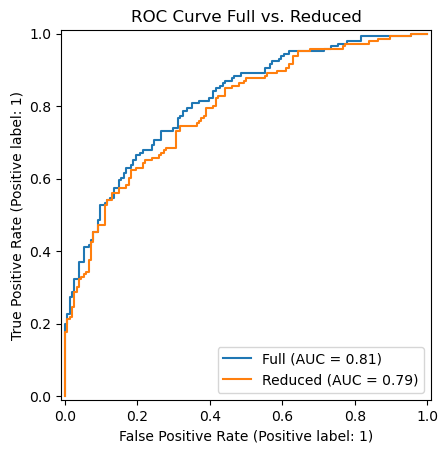

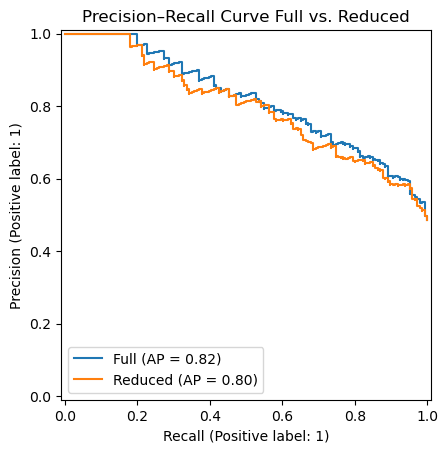

In [9]:
# TODO: Plot ROC and PR curves for both models on shared axes

fig, ax = plt.subplots()

# ROC
RocCurveDisplay.from_predictions(yf_test, yprob_full, name="Full", ax=ax)
RocCurveDisplay.from_predictions(yr_test, yprob_reduced, name="Reduced", ax=ax)
plt.title("ROC Curve Full vs. Reduced")
plt.show()

# PR
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(yf_test, yprob_full, name="Full", ax=ax)
PrecisionRecallDisplay.from_predictions(yr_test, yprob_reduced, name="Reduced", ax=ax)
plt.title("Precision–Recall Curve Full vs. Reduced")
plt.show()


## 5) Interpretation

1. Which model has higher **ROC-AUC** and **PR-AUC**? What does this imply about `PWAT`?  
2. Compare **accuracy**, **precision**, and **recall** for both models.  
   - Which model would you choose to **maximize event detection** (recall)?  
   - Which model would you choose to **minimize false alarms** (precision)?  

In [11]:
# Checking area under the curve and PR area under the curve

roc_auc_full = roc_auc_score(yf_test, yprob_full)
roc_auc_reduced = roc_auc_score(yr_test, yprob_reduced)
pr_auc_full = average_precision_score(yf_test, yprob_full)
pr_auc_reduced = average_precision_score(yr_test, yprob_reduced)

print(roc_auc_full)
print(roc_auc_reduced)
print(pr_auc_full)
print(pr_auc_reduced)

# Printing summary again

print(f"Full - Accuracy:  {acc_full:.3f}\nPrecision: {prec_full:.3f}\nRecall:    {rec_full:.3f}")
print(f"Reduced - Accuracy:  {acc_reduced:.3f}\nPrecision: {prec_reduced:.3f}\nRecall:    {rec_reduced:.3f}")

0.812399928838285
0.7911848425547054
0.8182944000552541
0.7981879391129133
Full - Accuracy:  0.723
Precision: 0.733
Recall:    0.678
Reduced - Accuracy:  0.717
Precision: 0.736
Recall:    0.651


1. The full model has higher ROC-AUC and PR-AUC. This implies that PWAT is informative and add information above and beyond what is provided by just using CAPE
2. The full model has slightly lower precision than the reduced model, but slightly better recall. Overall the full model seems better when considered across all measures. (Likely better to have better accuracy and recall but reduced precision, but this is a judgement call.)